# **Assignment 2: Content Analysis and Regression**

For this assignment, you need to test a hypothesis using multiple linear regression. Before doing that, you also need to use computational content analysis and NLP techniques to create new variables that you will use as a predictor in the regression model.

##**Research Background**##

According to Chatman (1980), characters are constructs within abstracted narratives, described through networks of personality traits (e.g., Sarrasine is feminine, Othello is jealous, Roland Deschain is brave). Docherty characterizes the process of depicting and interpreting characters in literature as 'characterization' (cited by Bennett and Royle, 2017). Reaske (1996) identifies several devices of characterization, including character appearance, asides and soliloquies, dialogue, hidden narration, language, and actions performed. Characterization is crucial in narrative because it allows readers to relate to characters and feel emotionally engaged in the story (Cohen, 2001). providing information on personalities and behaviors for gender representation analysis in fiction.

For this assignment, you'll work with a corpus of the genre Real Person Fiction (RPF), where characters are characterized by blending real-life traits with fans' interpretations and reimagination, reflecting societal and cultural trends.

On the online fanfiction platform AO3, fanfictions about the Korean boy band BTS represent the largest fandom, surpassing even the Marvel Universe and Harry Potter franchises. Research into the global popularity of the Korean Wave (*Hallyu*) has highlighted the concept of "manufactured versatile masculinity" exhibited by male K-pop idols, a blend of softer, more effeminate appearances or behaviors with traditional forms of hegemonic masculinity, described by scholars such as Jung (2011), Kuo et al. (2020), Kwon (2019), and Oh (2015). Oh (2015) terms this "liminal masculinity," with androgynous K-pop male idols crossing gender lines.

**Aim:**

This assignment aims to analyze the impact of soft masculinity on K-pop fanfiction's success using a corpus of 100 BTS fanfictions.

**Data:**

We will utilize a dataset from the GOLEM project, comprising 100 BTS-related fanfictions, including story ID, publication year, word count, kudos, comments, and story content in English (1,000 to 1,200 words).

**Methods:**
- operationalize the concept of 'soft masculinity' to make it measurable
- use regression analysis to test a hypothesis

In [1]:
# Load and check the dataset
import pandas as pd

df = pd.read_csv('BTS_short_100.csv', encoding="UTF-8")
df.head()

,story_id,published_year,words,kudos,comments,story_content
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...
2,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...
4,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...


Have you noticed something odd in the first five lines of this dataset?

There are some duplicates.

So first we need to do some data cleaning, checking how many rows are duplicated and deleting the duplicates.


In [2]:
# Get the number of unique rows
unique_story_ids = df['story_id'].nunique()

# Print the result
print(f"The number of unique 'story_id' values is: {unique_story_ids}")

The number of unique 'story_id' values is: 90


In [3]:
# Remove duplicate rows
df = df.drop_duplicates()

df.head()

,story_id,published_year,words,kudos,comments,story_content
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...
5,3651108,2015,1174,339.0,6.0,Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...
7,5282729,2015,1173,17.0,NaN,"Unspoken Words\n\nYou come back into the flat,..."


In [4]:
# Let's check how many rows there are now
df.shape[0]

90

##**Research Design**##
The steps of this research involve formulating a hypothesis, selecting `kudos` as a proxy for the success of a story -- the dependent variable (Y) -- and calculating a masculinity score to be used as the independent variable (x1). We will also use additional variables that are also likely to have an effect on the success of a story: `publication_year` (x2) - because AO3 user base has grown in time and more recent stories are more likely to receive more kudos simply becasue there are more readers on the platform - and lexical richness (x3) - because it's plausible that a story with a richer vocabulary also has a better style and, therefore, it's liked more by readers.

Note that we don't have variables for `masculinity_score` and `lexical_richness` yet, so we need to calculate them from the text of the stories.

The hypothesis states:

H1: Low levels of masculinity in male characters positively affects fanfiction success when controlling for publication year and lexical richness.

**H0: What is the null hypothesis?**

H0 (answer in words):
Low levels of masculinity in male characters do not affect fanfiction success when controlling for publication year and lexical richness.

In [5]:
#H0 (answer in words):
'''There is no assciation between levels of maculinity in male characters and the fanfiction sucess when controlling the publication year and lexical richness'''

'There is no assciation between levels of maculinity in male characters and the fanfiction sucess when controlling the publication year and lexical richness'

##**Compute Masculinity Score**##

To calculate a sterotypical masculinity score, we can refer to older theories of perceived gender identity that probably define gender roles in a stereotypical way. an example of this is the Bem Sex-Role Inventory (BSRI) by Dr. Sandra Lipzits Bem (1974), which classifies personality traits into masculine, feminine, and androgynous.

Bem divides personal traits into 60 traits: 20 masculine traits, 20 feminine traits and 20 neutral traits (see figure below).


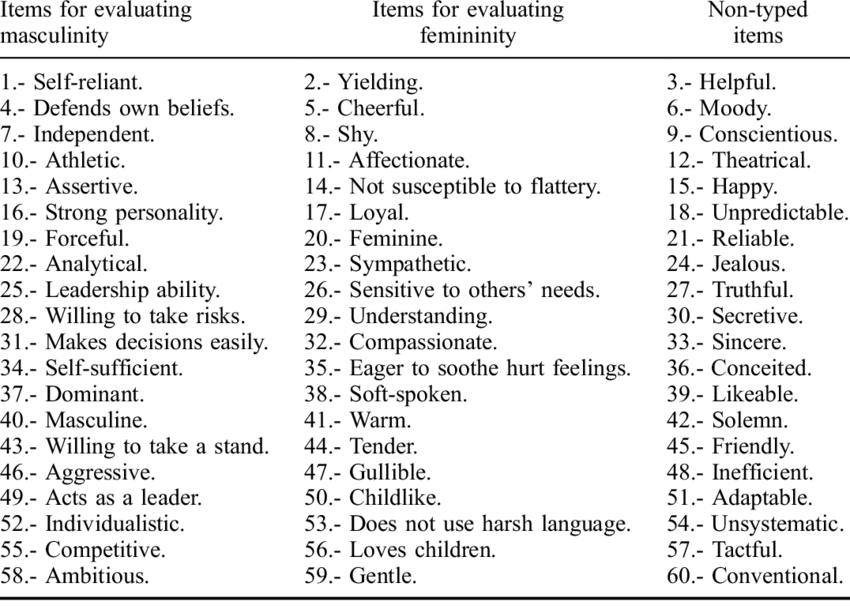

The above list shows that, despite recent discussions about masculinity, femininity, and gender roles have become more diversified, traditional definitions such as those provided by the Bem Sex-Role Inventory (BSRI) can be useful to detect gender stereotypes. Within the definitions of masculinity and femininity outlined by the BSRI, we observe a clear power imbalance: masculinity is associated with dominance (e.g., assertive, strong personality, forceful, leadership ability, dominant, aggressive, ambitious), while femininity leans towards submissiveness (e.g., yielding, understanding, tender). Therefore, we can consider employing the power-agent frames designed by Sap et al. to compute a power score for the male characters in the fanfiction stories. Lower masculinity scores can be plausibly associated with a representation of 'soft masculinity' in relation to a character.

###**Riveter**###

In the W5 lab, we have already gained preliminary experience with the Riveter pipeline.

In this section, we will use utilize the Riveter pipeline with Sap's power-agent frames to calculate the `masculinity_score` for identifiable agents in the text. Since we are interested only in the masculinity of male characters, we will use regular expressions to identify male pronouns (he, him, himself) and calculate their corresponding `masculinity_score`. This score will be added to the df as a new column.


In [7]:
# Set up everything you need to use Riveter, following the notebook we used in W5 lab
# No need to put the code here, as long as it's working
# We assume that you have installed all the required packages, either locally or on Colab

In [6]:
#import google drive, to connect the colab to the drive to read and save contents in the drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [8]:
# specify a place in my Google Drive where I'd like to save the output of this notebook
colab_directory_path = '/content/gdrive/MyDrive/riveter-test'

In [9]:
#go inside the folder
%cd /content/gdrive/MyDrive/riveter-test

/content/gdrive/MyDrive/riveter-test


In [10]:
#download the Riveter code and data from its Github repository
! git clone https://github.com/maartensap/riveter-nlp.git

fatal: destination path 'riveter-nlp' already exists and is not an empty directory.


In [11]:
#check that the download was successful by printing the contents of my Google Drive folder.
%ls

barplot.pride_and_prejudice.least_power.pdf  heatmap.pride_and_prejudice.misslucas.pdf
barplot.pride_and_prejudice.most_power.pdf   heatmap.pride_and_prejudice.mrdarcy.pdf
barplot.prideandprejudice.pronouns.pdf       heatmap.pride_and_prejudice.sirwilliam.pdf
heatmap.pride_and_prejudice.elizabeth.pdf    heatmap.prideandprejudice.thirdplural.pdf
heatmap.prideandprejudice.feminine.pdf       riveter-nlp/
heatmap.pride_and_prejudice.lizzy.pdf        riveter.pride_and_prejudice.pkl
heatmap.prideandprejudice.masculine.pdf


In [12]:
# move inside the Riveter folder,  to import the functions we want to use
%cd /content/gdrive/MyDrive/riveter-test/riveter-nlp/riveter

/content/gdrive/MyDrive/riveter-test/riveter-nlp/riveter


In [13]:
#install some spaCy models and Python packages to support Riveter
!pip install -U spacy-experimental

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 669.5/669.5 kB 5.4 MB/s eta 0:00:00


In [14]:
# downlaod ~500Mb of data
!pip install https://github.com/explosion/spacy-experimental/releases/download/v0.6.0/en_coreference_web_trf-3.4.0a0-py3-none-any.whl#egg=en_coreference_web_trf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 490.3/490.3 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 919.6/919.6 kB 59.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 84.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 81.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.0/314.0 kB 30.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Usin

In [15]:
#download spacy
!python -m spacy download en_core_web_sm

2024-05-31 19:34:19.319552: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-31 19:34:19.319647: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-31 19:34:19.323276: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-31 19:34:19.339091: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-31 19:34:20.947003: W tensorflow/compiler/tf2

In [16]:
#install seaborn
!pip install seaborn

Now we have prepared all the dependencies needed.

In [17]:
from collections import defaultdict
import os
import pandas as pd
import random
from riveter import Riveter # if the notebook is not in the /riveter folder, this will throw an error

import seaborn as sns
import matplotlib.pyplot as plt

**Prepare the corpus**:

First, we can try to initialize two lists to store `story_content` and `story_id`, but this will casue the problem below:

`Token indices sequence length is longer than the specified maximum sequence length for this model (574 > 512).`

This is a limit of the language model (BERT) used by Riveter. We need to split the file into smaller chunks in order for it to be processed correctly. The example in the original Riveter notebook where they load *Pride and Prejudice* shows how we can do this. The code is also provided here below.




In [18]:
def split_text_into_segments(text, max_length=512):
    """
    Segment the text so that each segment contains a maximum of max length tokens.
    """
    segments = []
    current_segment = []
    for word in text.split():
        if len(current_segment) + len(word.split()) <= max_length:
            current_segment.append(word)
        else:
            segments.append(' '.join(current_segment))
            current_segment = [word]
    if current_segment:
        segments.append(' '.join(current_segment))
    return segments

Let's first initialize Riveter with the lexicon that we are going to use:

In [19]:
# Q0 (code): Load lexicon 'power' and create an empty dictionary called 'scores_dict'
# create an exmpty dictionary named "scores_dict""
scores_dict= {}
# create an instance of the Riveter class
riveter = Riveter()
#load lexicon 'power'
riveter.load_sap_lexicon('power')


Now we can apply the splitting function we defined above and then use Riveter on our corpus. To do this, we need to create a loop that iterates through all the rows in the dataframe and compute scores for each story.

**Q1. Train Riveter to assign scores to text based on male pronouns**

In [29]:
from tqdm import tqdm # used to display a progress bar when executing code

# create a loop that iterates through all rows in the dataframe and conduct computation
for index, row in tqdm(df.iterrows(), total=df.shape[0], desc="Processing stories"):
    # create a list of story id
    story_id = row['story_id']
    #create a list of story content
    story_content = row['story_content']

    # apply the splitting function to segment the story content from text into segments
    segments = split_text_into_segments(story_content)
    # create unique text id for each segments
    text_ids = [f"{story_id}_{i}" for i in range(len(segments))]

    # Q1 (code): train riveter specifying 'persona_patterns_dict= ' to assign scores only based on male pronouns
    # write code below:
    # train rivetor as instruction to assign scores based on male pronouns for each segments
    riveter.train(segments,
             text_ids,
             num_bootstraps=20,
             persona_patterns_dict={'masculine': r'^he$|^him$|^himself$'})

    # store the computed scores in a dictionary named 'persona_score_dic'
    persona_score_dict = riveter.get_score_totals(frequency_threshold=1)
    masculine_score = persona_score_dict.get('masculine', 0)

    # get a feedback about the computed scores while the code is running
    print(f"Story ID: {story_id}, Masculine Power Score: {masculine_score}")

    # store the score of each story in the same dictionary so that we can then add it to the dataframe
    scores_dict[story_id] = masculine_score

# add the dictionary of scores to the dataframe
df['masculine_power_score'] = df['story_id'].map(scores_dict)

Processing stories:   1%|          | 1/90 [00:38<56:34, 38.14s/it]

2024-05-31 16:21:31 Complete!
Story ID: 4706144, Masculine Power Score: 0.08408160712109544



Processing stories:   2%|▏         | 2/90 [01:11<51:57, 35.42s/it]

2024-05-31 16:22:04 Complete!
Story ID: 4752980, Masculine Power Score: 0.25398325136088457



Processing stories:   3%|▎         | 3/90 [01:41<47:37, 32.84s/it]

2024-05-31 16:22:34 Complete!
Story ID: 4621698, Masculine Power Score: 0.5917460317460318



Processing stories:   4%|▍         | 4/90 [02:14<47:20, 33.03s/it]

2024-05-31 16:23:07 Complete!
Story ID: 3651108, Masculine Power Score: 0.11521838200163008



Processing stories:   6%|▌         | 5/90 [02:50<48:20, 34.12s/it]

2024-05-31 16:23:43 Complete!
Story ID: 5282729, Masculine Power Score: 0.216968017645437



Processing stories:   7%|▋         | 6/90 [03:25<48:00, 34.29s/it]

2024-05-31 16:24:18 Complete!
Story ID: 5533886, Masculine Power Score: 0.008435846560846562



Processing stories:   8%|▊         | 7/90 [04:08<51:25, 37.17s/it]

2024-05-31 16:25:01 Complete!
Story ID: 4547622, Masculine Power Score: 0.06458318762021331



Processing stories:   9%|▉         | 8/90 [04:38<47:36, 34.83s/it]

2024-05-31 16:25:31 Complete!
Story ID: 16177508, Masculine Power Score: 0.16239374383518432



Processing stories:  10%|█         | 9/90 [05:12<46:52, 34.72s/it]

2024-05-31 16:26:05 Complete!
Story ID: 15745185, Masculine Power Score: -0.09376858569520803



 33%|███▎      | 1/3 [00:16<00:32, 16.21s/it]Token indices sequence length is longer than the specified maximum sequence length for this model (575 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (575 > 512). Running this sequence through the model will result in indexing errors

Processing stories:  11%|█         | 10/90 [06:01<52:04, 39.06s/it]

2024-05-31 16:26:54 Complete!
Story ID: 15654528, Masculine Power Score: 0.16615412008100222



Processing stories:  12%|█▏        | 11/90 [06:48<54:45, 41.59s/it]

2024-05-31 16:27:42 Complete!
Story ID: 7448155, Masculine Power Score: 0.3372478375194978



Processing stories:  13%|█▎        | 12/90 [07:35<56:13, 43.25s/it]

2024-05-31 16:28:29 Complete!
Story ID: 4983847, Masculine Power Score: 0.11395197964027433



Processing stories:  14%|█▍        | 13/90 [08:14<53:40, 41.83s/it]

2024-05-31 16:29:07 Complete!
Story ID: 3313118, Masculine Power Score: -0.21433029832486356



Processing stories:  16%|█▌        | 14/90 [08:48<50:09, 39.60s/it]

2024-05-31 16:29:42 Complete!
Story ID: 3290390, Masculine Power Score: -0.09918641611506615



Processing stories:  17%|█▋        | 15/90 [09:39<53:39, 42.93s/it]

2024-05-31 16:30:32 Complete!
Story ID: 36435301, Masculine Power Score: 0.04692334970972742



Processing stories:  18%|█▊        | 16/90 [10:15<50:26, 40.90s/it]

2024-05-31 16:31:08 Complete!
Story ID: 36575491, Masculine Power Score: 0.2630657310365554



Processing stories:  19%|█▉        | 17/90 [10:48<46:56, 38.58s/it]

2024-05-31 16:31:42 Complete!
Story ID: 35225224, Masculine Power Score: 0.24685322705623217



Processing stories:  20%|██        | 18/90 [11:21<44:09, 36.80s/it]

2024-05-31 16:32:14 Complete!
Story ID: 4594527, Masculine Power Score: 0.1850152625152625



Processing stories:  21%|██        | 19/90 [11:53<41:57, 35.46s/it]

2024-05-31 16:32:47 Complete!
Story ID: 5485625, Masculine Power Score: 0.09766578249336869



Processing stories:  22%|██▏       | 20/90 [12:25<39:58, 34.27s/it]

2024-05-31 16:33:18 Complete!
Story ID: 36408319, Masculine Power Score: 0.1147250479139024



Processing stories:  23%|██▎       | 21/90 [13:04<41:10, 35.81s/it]

2024-05-31 16:33:58 Complete!
Story ID: 35762659, Masculine Power Score: 0.2101843030890132



Processing stories:  24%|██▍       | 22/90 [13:57<46:09, 40.73s/it]

2024-05-31 16:34:50 Complete!
Story ID: 35603194, Masculine Power Score: 0.35962838129807273



Processing stories:  26%|██▌       | 23/90 [14:50<49:38, 44.46s/it]

2024-05-31 16:35:43 Complete!
Story ID: 35344306, Masculine Power Score: 0.1142517273780305



Processing stories:  27%|██▋       | 24/90 [15:25<45:50, 41.68s/it]

2024-05-31 16:36:18 Complete!
Story ID: 36695155, Masculine Power Score: 0.11166666666666669



Processing stories:  28%|██▊       | 25/90 [16:01<43:24, 40.07s/it]

2024-05-31 16:36:54 Complete!
Story ID: 36064474, Masculine Power Score: 0.10511510006169147



Processing stories:  29%|██▉       | 26/90 [16:50<45:27, 42.61s/it]

2024-05-31 16:37:43 Complete!
Story ID: 36024820, Masculine Power Score: 0.1614610440077709



Processing stories:  30%|███       | 27/90 [17:51<50:29, 48.08s/it]

2024-05-31 16:38:44 Complete!
Story ID: 35182330, Masculine Power Score: 0.03594754398656395



Processing stories:  31%|███       | 28/90 [18:51<53:33, 51.83s/it]

2024-05-31 16:39:44 Complete!
Story ID: 36567496, Masculine Power Score: 0.21166371925463073



Processing stories:  32%|███▏      | 29/90 [19:31<49:06, 48.31s/it]

2024-05-31 16:40:24 Complete!
Story ID: 35560330, Masculine Power Score: 0.14857244510707507



Processing stories:  33%|███▎      | 30/90 [20:20<48:31, 48.53s/it]

2024-05-31 16:41:13 Complete!
Story ID: 35877496, Masculine Power Score: 0.03961887827801279



Processing stories:  34%|███▍      | 31/90 [21:09<47:41, 48.50s/it]

2024-05-31 16:42:02 Complete!
Story ID: 35957410, Masculine Power Score: 0.2897013616691



Processing stories:  36%|███▌      | 32/90 [22:08<50:01, 51.75s/it]

2024-05-31 16:43:01 Complete!
Story ID: 30947654, Masculine Power Score: 0.03339160401002507



Processing stories:  37%|███▋      | 33/90 [23:21<55:03, 57.96s/it]

2024-05-31 16:44:14 Complete!
Story ID: 36332707, Masculine Power Score: -0.11015577218711572



Processing stories:  38%|███▊      | 34/90 [24:13<52:29, 56.24s/it]

2024-05-31 16:45:06 Complete!
Story ID: 35967940, Masculine Power Score: 0.17642893638385065



Processing stories:  39%|███▉      | 35/90 [25:08<51:22, 56.05s/it]

2024-05-31 16:46:02 Complete!
Story ID: 35001073, Masculine Power Score: 0.11632395382395384



Processing stories:  40%|████      | 36/90 [26:27<56:26, 62.72s/it]

2024-05-31 16:47:20 Complete!
Story ID: 35138911, Masculine Power Score: 0.13293323977546112



Processing stories:  41%|████      | 37/90 [27:07<49:32, 56.08s/it]

2024-05-31 16:48:00 Complete!
Story ID: 35280397, Masculine Power Score: 0.24837081339712913



Processing stories:  42%|████▏     | 38/90 [27:52<45:33, 52.58s/it]

2024-05-31 16:48:45 Complete!
Story ID: 36049939, Masculine Power Score: 0.28052288258108093



Processing stories:  43%|████▎     | 39/90 [28:34<42:01, 49.44s/it]

2024-05-31 16:49:27 Complete!
Story ID: 34995673, Masculine Power Score: 0.1493404138994201



Processing stories:  44%|████▍     | 40/90 [29:18<39:51, 47.82s/it]

2024-05-31 16:50:11 Complete!
Story ID: 33477346, Masculine Power Score: 0.43662518853695326



Processing stories:  46%|████▌     | 41/90 [29:50<35:14, 43.15s/it]

2024-05-31 16:50:43 Complete!
Story ID: 36840832, Masculine Power Score: -0.2113227415858995



Processing stories:  47%|████▋     | 42/90 [30:22<31:54, 39.89s/it]

2024-05-31 16:51:15 Complete!
Story ID: 30896276, Masculine Power Score: 0.0718045112781955



Processing stories:  48%|████▊     | 43/90 [30:53<29:10, 37.24s/it]

2024-05-31 16:51:47 Complete!
Story ID: 37363471, Masculine Power Score: 0.42067099567099564



Processing stories:  49%|████▉     | 44/90 [31:27<27:39, 36.08s/it]

2024-05-31 16:52:20 Complete!
Story ID: 36984901, Masculine Power Score: 0.09814981221630836



Processing stories:  50%|█████     | 45/90 [32:00<26:21, 35.14s/it]

2024-05-31 16:52:53 Complete!
Story ID: 33353644, Masculine Power Score: -0.04232402031930333



Processing stories:  51%|█████     | 46/90 [32:48<28:36, 39.02s/it]

2024-05-31 16:53:41 Complete!
Story ID: 37002835, Masculine Power Score: -0.12577228327228326



Processing stories:  52%|█████▏    | 47/90 [33:20<26:30, 36.98s/it]

2024-05-31 16:54:13 Complete!
Story ID: 5630824, Masculine Power Score: 0.32040627885503226



Processing stories:  53%|█████▎    | 48/90 [33:57<25:49, 36.89s/it]

2024-05-31 16:54:50 Complete!
Story ID: 10053617, Masculine Power Score: 0.23248047634447094



Processing stories:  54%|█████▍    | 49/90 [35:00<30:37, 44.82s/it]

2024-05-31 16:55:53 Complete!
Story ID: 1572659, Masculine Power Score: 0.25681492527080757



Processing stories:  56%|█████▌    | 50/90 [35:51<31:09, 46.73s/it]

2024-05-31 16:56:44 Complete!
Story ID: 7450573, Masculine Power Score: 0.2824175824175824



Processing stories:  57%|█████▋    | 51/90 [36:28<28:26, 43.76s/it]

2024-05-31 16:57:21 Complete!
Story ID: 6918676, Masculine Power Score: 0.0838766165272299



Processing stories:  58%|█████▊    | 52/90 [37:15<28:22, 44.82s/it]

2024-05-31 16:58:08 Complete!
Story ID: 6075402, Masculine Power Score: 0.3625470579185227



Processing stories:  59%|█████▉    | 53/90 [37:58<27:17, 44.26s/it]

2024-05-31 16:58:51 Complete!
Story ID: 11101779, Masculine Power Score: 0.3376465201465201



Processing stories:  60%|██████    | 54/90 [38:40<26:07, 43.54s/it]

2024-05-31 16:59:33 Complete!
Story ID: 11321331, Masculine Power Score: 0.15105783220305097



Processing stories:  61%|██████    | 55/90 [39:14<23:42, 40.65s/it]

2024-05-31 17:00:07 Complete!
Story ID: 12284853, Masculine Power Score: 0.14000198783184378



Processing stories:  62%|██████▏   | 56/90 [39:49<21:59, 38.80s/it]

2024-05-31 17:00:42 Complete!
Story ID: 12282003, Masculine Power Score: 0.10620818804967556



Processing stories:  63%|██████▎   | 57/90 [40:20<20:11, 36.70s/it]

2024-05-31 17:01:13 Complete!
Story ID: 7613533, Masculine Power Score: 0



Processing stories:  64%|██████▍   | 58/90 [40:56<19:21, 36.28s/it]

2024-05-31 17:01:49 Complete!
Story ID: 4228053, Masculine Power Score: 0.21717551212779213



Processing stories:  66%|██████▌   | 59/90 [41:33<18:59, 36.74s/it]

2024-05-31 17:02:27 Complete!
Story ID: 12127317, Masculine Power Score: 0.13639577623638224



Processing stories:  67%|██████▋   | 60/90 [42:05<17:34, 35.14s/it]

2024-05-31 17:02:58 Complete!
Story ID: 12010134, Masculine Power Score: 0.2313817559476464



Processing stories:  68%|██████▊   | 61/90 [42:45<17:41, 36.60s/it]

2024-05-31 17:03:38 Complete!
Story ID: 11510919, Masculine Power Score: 0.4806171919478371



Processing stories:  69%|██████▉   | 62/90 [43:23<17:13, 36.92s/it]

2024-05-31 17:04:16 Complete!
Story ID: 8145802, Masculine Power Score: 0.1794930783925684



Processing stories:  70%|███████   | 63/90 [44:06<17:32, 38.99s/it]

2024-05-31 17:04:59 Complete!
Story ID: 6637942, Masculine Power Score: -0.1545139477323372



Processing stories:  71%|███████   | 64/90 [44:55<18:08, 41.85s/it]

2024-05-31 17:05:48 Complete!
Story ID: 7427905, Masculine Power Score: -0.023205558499676142



Processing stories:  72%|███████▏  | 65/90 [45:29<16:24, 39.40s/it]

2024-05-31 17:06:22 Complete!
Story ID: 3893857, Masculine Power Score: 0.1320407115060403



Processing stories:  73%|███████▎  | 66/90 [46:03<15:07, 37.80s/it]

2024-05-31 17:06:56 Complete!
Story ID: 33040258, Masculine Power Score: 0.22680776014109347



Processing stories:  74%|███████▍  | 67/90 [46:41<14:34, 38.04s/it]

2024-05-31 17:07:34 Complete!
Story ID: 33858850, Masculine Power Score: -0.1872344605858538



Processing stories:  76%|███████▌  | 68/90 [47:21<14:09, 38.59s/it]

2024-05-31 17:08:14 Complete!
Story ID: 2775776, Masculine Power Score: 0.24956654456654453



Processing stories:  77%|███████▋  | 69/90 [47:57<13:10, 37.64s/it]

2024-05-31 17:08:50 Complete!
Story ID: 3197963, Masculine Power Score: 0.27728632478632476



Processing stories:  78%|███████▊  | 70/90 [48:31<12:16, 36.81s/it]

2024-05-31 17:09:25 Complete!
Story ID: 12395199, Masculine Power Score: 0.16298366850075646



Processing stories:  79%|███████▉  | 71/90 [49:09<11:44, 37.08s/it]

2024-05-31 17:10:02 Complete!
Story ID: 10934010, Masculine Power Score: 0.2616447903947904



Processing stories:  80%|████████  | 72/90 [49:42<10:46, 35.90s/it]

2024-05-31 17:10:35 Complete!
Story ID: 12301116, Masculine Power Score: 0.0784849731276597



Processing stories:  81%|████████  | 73/90 [50:19<10:13, 36.08s/it]

2024-05-31 17:11:12 Complete!
Story ID: 12706317, Masculine Power Score: -0.1418596001211271



Processing stories:  82%|████████▏ | 74/90 [51:01<10:08, 38.06s/it]

2024-05-31 17:11:55 Complete!
Story ID: 11499468, Masculine Power Score: 0.09424026378485113



Processing stories:  83%|████████▎ | 75/90 [51:38<09:26, 37.74s/it]

2024-05-31 17:12:32 Complete!
Story ID: 12184146, Masculine Power Score: 0.3087980232840165



Processing stories:  84%|████████▍ | 76/90 [52:11<08:28, 36.30s/it]

2024-05-31 17:13:05 Complete!
Story ID: 12201333, Masculine Power Score: 0.11749474929228984



Processing stories:  86%|████████▌ | 77/90 [52:56<08:23, 38.76s/it]

2024-05-31 17:13:49 Complete!
Story ID: 11496030, Masculine Power Score: 0.07368422935147781



Processing stories:  87%|████████▋ | 78/90 [53:33<07:38, 38.23s/it]

2024-05-31 17:14:26 Complete!
Story ID: 11510277, Masculine Power Score: 0.22317858810852703



Processing stories:  88%|████████▊ | 79/90 [54:14<07:09, 39.09s/it]

2024-05-31 17:15:07 Complete!
Story ID: 10772274, Masculine Power Score: 0.4284068492069754



Processing stories:  89%|████████▉ | 80/90 [54:54<06:32, 39.26s/it]

2024-05-31 17:15:47 Complete!
Story ID: 12646050, Masculine Power Score: 0.03986704729738785



Processing stories:  90%|█████████ | 81/90 [55:28<05:39, 37.68s/it]

2024-05-31 17:16:21 Complete!
Story ID: 11161479, Masculine Power Score: 2.954981875190332e-06



Processing stories:  91%|█████████ | 82/90 [56:04<04:57, 37.17s/it]

2024-05-31 17:16:57 Complete!
Story ID: 12069936, Masculine Power Score: 0.05791383219954649



Processing stories:  92%|█████████▏| 83/90 [56:43<04:24, 37.75s/it]

2024-05-31 17:17:36 Complete!
Story ID: 12285972, Masculine Power Score: 0.3510341686242352



Processing stories:  93%|█████████▎| 84/90 [57:17<03:40, 36.81s/it]

2024-05-31 17:18:10 Complete!
Story ID: 12372702, Masculine Power Score: -0.00013923698134224295



Processing stories:  94%|█████████▍| 85/90 [57:55<03:06, 37.20s/it]

2024-05-31 17:18:49 Complete!
Story ID: 12610496, Masculine Power Score: 0.084615755035967



Processing stories:  96%|█████████▌| 86/90 [58:37<02:34, 38.66s/it]

2024-05-31 17:19:31 Complete!
Story ID: 10970472, Masculine Power Score: 0.13958483645983646



Processing stories:  97%|█████████▋| 87/90 [59:10<01:50, 36.82s/it]

2024-05-31 17:20:03 Complete!
Story ID: 12084552, Masculine Power Score: 0.3542163964203438



Processing stories:  98%|█████████▊| 88/90 [1:00:18<01:32, 46.31s/it]

2024-05-31 17:21:12 Complete!
Story ID: 12727119, Masculine Power Score: -0.05442576466111039



Processing stories:  99%|█████████▉| 89/90 [1:01:15<00:49, 49.29s/it]

2024-05-31 17:22:08 Complete!
Story ID: 11962824, Masculine Power Score: 0.0



Processing stories: 100%|██████████| 90/90 [1:01:58<00:00, 41.31s/it]

2024-05-31 17:22:51 Complete!
Story ID: 10859508, Masculine Power Score: 0.21901655607118284


**Q2. Print a sample of the dataframe to check whether the `masculine_power_score` has been added correctly**

In [20]:
# Q2 (code)
df.head()

,story_id,published_year,words,kudos,comments,story_content
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...
5,3651108,2015,1174,339.0,6.0,Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...
7,5282729,2015,1173,17.0,NaN,"Unspoken Words\n\nYou come back into the flat,..."


In [32]:
# If you use google colab, it's better to save this result locally in case the connection breaks and then you lose the result.
df.to_csv('/content/df.csv', index=False)

##**Compute Lexical Richness Score**##

'Lexical richness' refers to the range and variety of vocabulary deployed in a text by a speaker/writer. 'Lexical richness' is a term used interchangeably with 'lexical diversity', 'lexical variation', 'lexical density', and 'vocabulary richnes', and it's measured by a wide variety of indices. Uses include (but are not limited to) measuring writing quality, vocabulary knowledge, speaker competence, and socioeconomic status.


The type-token ratio (TTR) is a simple measure of lexical diversity within a text. It is calculated by dividing the number of unique words (types) by the total number of words (tokens) in the given text. A higher TTR indicates a greater variety of vocabulary, suggesting richer lexical content. Conversely, a lower TTR suggests more repetitive use of vocabulary. TTR is often used to assess the lexical complexity of written or spoken material.

Here we use the package `lexicalrichness` (https://pypi.org/project/lexicalrichness/) to compute type-token ratio (TTR) for each story as a control on their language quality.

In [23]:
!pip install lexicalrichness

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.8/97.8 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lexicalrichness: filename=lexicalrichness-0.5.1-py3-none-any.whl size=15417 sha256=e47b9b0db7d4c2837784507ab2df5c69505722db69788492b00dd087c8f5da93
  Stored in directory: /root/.cache/pip/wheels/cd/ba/80/d4dabc1bf242a672ffc00226a2303a7471bb841c0872b2c212
Successfully built lexicalrichness


In [26]:
from lexicalrichness import LexicalRichness

# Define a function that calculates the lexical richness of the text
def calculate_lexical_richness(text):
    # Create a LexicalRichness object for the text
    lex = LexicalRichness(text)
    # Compute type-token ratio (TTR)
    return lex.ttr  # Returns the type-token ratio

# Apply the function to the 'story content' column in the DataFrame
df['lexical_richness'] = df['story_content'].apply(calculate_lexical_richness)

# Display the DataFrame with the new 'lexical_richness' column
df.head()

,story_id,published_year,words,kudos,comments,story_content,masculine_power_score,lexical_richness
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...,0.084082,0.428571
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...,0.253983,0.400665
2,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...,0.591746,0.428986
3,3651108,2015,1174,339.0,6.0,Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...,0.115218,0.412295
4,5282729,2015,1173,17.0,NaN,"Unspoken Words\n\nYou come back into the flat,...",0.216968,0.376110


Now that we have both the two new variables added to the dataframe, we have all we need to test our hypothesis with linear regression.

##**Regressions**##


**Methodology**

- Multiple Linear Regression: Perform a regression analysis with `kudos` as the dependent variable and `masculine_power_score`, `published_year`, and `words` as independent variables.
- Residual Analysis: Conduct normality and homoscedasticity tests on the residuals to validate the assumptions of linear regression.
- Model Evaluation: Assess the model using adjusted R-squared, F-test, and t-tests for individual coefficients.
- Multicollinearity Check: Calculate the Variance Inflation Factor (VIF) for the independent variables to detect possible multicollinearity.

**Q3. Check the data distribution and handle missing values**


array([[<Axes: title={'center': 'kudos'}>,
        <Axes: title={'center': 'masculine_power_score'}>],
       [<Axes: title={'center': 'published_year'}>,
        <Axes: title={'center': 'words'}>]], dtype=object)

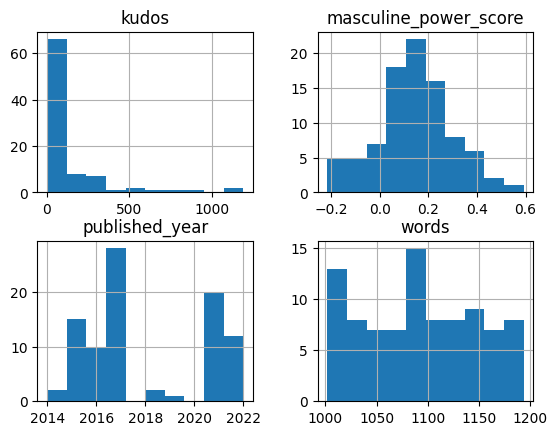

In [27]:
# Q3a (code): Check data distribution
variables_df = df[['kudos', 'masculine_power_score', 'published_year', 'words']]
variables_df.hist()


In [28]:
# Q3b (code): compute some descriptive statistics
df.describe()

,story_id,published_year,words,kudos,comments,masculine_power_score,lexical_richness
count,9.000000e+01,90.000000,90.000000,89.000000,65.000000,90.000000,90.000000
mean,1.839576e+07,2018.088889,1094.344444,135.393258,6.923077,0.144028,0.405027
std,1.307922e+07,2.612177,55.327048,229.972311,7.005149,0.157030,0.037109
min,1.572659e+06,2014.000000,1002.000000,1.000000,1.000000,-0.214330,0.264443
25%,7.448760e+06,2016.000000,1042.250000,20.000000,2.000000,0.059581,0.384458
50%,1.224167e+07,2017.000000,1095.000000,54.000000,5.000000,0.137990,0.410169
75%,3.517148e+07,2021.000000,1141.750000,122.000000,9.000000,0.247991,0.428415
max,3.736347e+07,2022.000000,1194.000000,1190.000000,36.000000,0.591746,0.491349


In [36]:
# Q3c (code): Check for any missing values

# count missing data
count_missing = df[['kudos', 'masculine_power_score', 'published_year', 'words']].isnull().any().sum()


# Check whether there is a data point for each participant on both variables
if count_missing == 0:
    # print result if no missing data
    print("There is no missing data." )
else:
     # print the count of missing data if there is any
    print(f"There are {count_missing} data points missing. ")


There are 1 data points missing. 


In [64]:
# Q3d (code): replace all the NA values with zeros and check again Q3c

# replace process
df.fillna(0, inplace=True)


#Check for any missing values again
count_missing = df[['kudos', 'masculine_power_score', 'published_year', 'words']].isnull().any().sum()


# Check whether there is a data point for each participant on both variables
if count_missing == 0:
    # print result if no missing data
    print("There is no missing data after replace process." )
else:
     # print the count of missing data if there is any
    print("There are {count_missing} data points missing after replace process.")


There is no missing data after replace process.


It's always important to visualize the data to inspect the distributions of values for the variables your interested in (do you remember the dinosaur data shown in class?).

**Q4. Create a scatterplot with `masculine_power_score` and `kudos`**

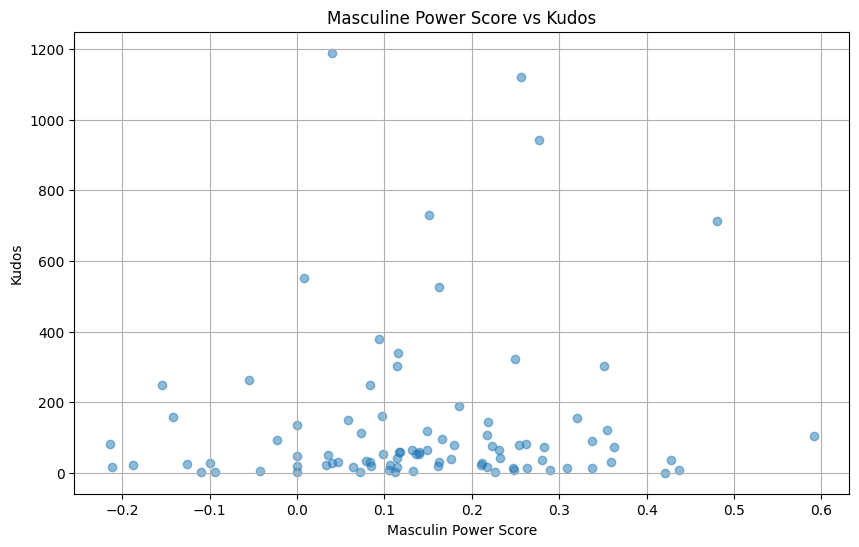

In [39]:
# Q4 (code): import matplotlib.pyplot as plt

# import package for plot display
import matplotlib.pyplot as plt

# define the size of plot
plt.figure(figsize=(10, 6))
# define variables displayed
plt.scatter(df['masculine_power_score'], df['kudos'], alpha=0.5)
# define the title of the plot
plt.title('Masculine Power Score vs Kudos')
# define the label of x-axis
plt.xlabel('Masculin Power Score')
# define the lable of y-axis
plt.ylabel('Kudos')
# enable grid lines on the plot
plt.grid(True)
# display the plot
plt.show()

**Q5. Multiple Regression and Analysis**

In [40]:
# Q5 (code): Do OLS Multiple Regression and print the regression result summary
#y = Kudos, X = masculine_power_score ，published_year，lexical_richness

# import statsmodels for OLS multiple regression
import statsmodels.api as sm

# define dependent variable y
y = df['kudos']
# define in dependent variables x
X = df[['masculine_power_score','published_year','lexical_richness']]


#for statsmodels, adding a constant to include an intercept in the model
X_sm= sm.add_constant(X)

#fit the model
model_sm = sm.OLS(y, X_sm).fit()

# print the result
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  kudos   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     5.569
Date:                Fri, 31 May 2024   Prob (F-statistic):            0.00154
Time:                        19:45:53   Log-Likelihood:                -608.30
No. Observations:                  90   AIC:                             1225.
Df Residuals:                      86   BIC:                             1235.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  6.967e+

In [41]:
# Q6a (words): Interpret the R-squared and Adj. R-squared
'''R-squared: 16.3% of the variation in "kudos" can be explained by the model's predictors (masculine power score, published year, and lexical richness). The majority of "kudos" are unexplained by these specific predictors. There may be other factors influencing "kudos". Adj. R-squared is to balance the impact of increasing the number of independent variables on the loss of degrees of freedom.After adjusting for the number of predictors, only 13.3% of the variation in "kudos" is explained by the model. The observation points do not fit the model well.
THerefore,further tests need to be conducted.'''

'R-squared: 16.3% of the variation in "kudos" can be explained by the model\'s predictors (masculine power score, published year, and lexical richness). The majority of "kudos" are unexplained by these specific predictors. There may be other factors influencing "kudos". Adj. R-squared is to balance the impact of increasing the number of independent variables on the loss of degrees of freedom.After adjusting for the number of predictors, only 13.3% of the variation in "kudos" is explained by the model. The observation points do not fit the model well.\nTHerefore,further tests need to be conducted.'

In [42]:
# Q6b (words): Interpret F-test result

'''The F-statistic is 5.48, suggesting that the explained variance is approximately 5.548 times greater than the unexplained variance due to the model.The overall linear relationship of the equation is significant,which does not necessarily mean that the impact of each explanatory variable on the dependent variable is significant. Further significance tests need to be conductedon each explanatory variable.'''

'The F-statistic is 5.48, suggesting that the explained variance is approximately 5.548 times greater than the unexplained variance due to the model.The overall linear relationship of the equation is significant,which does not necessarily mean that the impact of each explanatory variable on the dependent variable is significant. Further significance tests need to be conductedon each explanatory variable.'

In [69]:
# Q6c (words): Interpret coefficients and t-test result
'''const (6.967e+04): The constant term is significantly different from zero, which may represent the base number of kudos when all other variables are held at zero.The coefficient for masculine power score is approximately 65.5951 and the coefficient for lexical richness is approximately 392.6562, both suggesting that an increase in them is associated with an increase in "kudos.". Masculine Power Score and Lexical Richness both have high p-values (0.652 and 0.522, respectively), suggesting that we cannot reject the null hypothesis for these predictors. Therefore, within this model, they do not have a statistically significant impact on "kudos." Published Year, on the other hand, has a very low p-value, indicating that its effect on "kudos" is statistically significant.This is suggesting that the time of publication has a significant and negative impact on the reception of "kudos."The large F-statistic (5.569) and its associated low probability (0.00154) suggest that the overall model is statistically significant compared to a model without any predictors.'''

'const (6.967e+04): The constant term is significantly different from zero, which may represent the base number of kudos when all other variables are held at zero.The coefficient for masculine power score is approximately 65.5951 and the coefficient for lexical richness is approximately 392.6562, both suggesting that an increase in them is associated with an increase in "kudos.". Masculine Power Score and Lexical Richness both have high p-values (0.652 and 0.522, respectively), suggesting that we cannot reject the null hypothesis for these predictors. Therefore, within this model, they do not have a statistically significant impact on "kudos." Published Year, on the other hand, has a very low p-value, indicating that its effect on "kudos" is statistically significant.This is suggesting that the time of publication has a significant and negative impact on the reception of "kudos."The large F-statistic (5.569) and its associated low probability (0.00154) suggest that the overall model is

Based on the OLS regression results provided, here is an example analysis:

The model's R-squared value of 0.162 indicates that approximately 16.2% of the variability in the kudos can be explained by the model. While this suggests that the model explains a portion of the variability, there remains a significant amount unaccounted for, which might be explained by factors not included in the model.

The adjusted R-squared value of 0.133 takes into account the number of predictors in the model and the number of observations, showing a slight decrease from the R-squared value, which is normal as it adjusts for the number of terms in the model.

Looking at the coefficients:

const (6.995e+04): The constant term is significantly different from zero, which may represent the base number of kudos when all other variables are held at zero.
masculine_power_score (59.7927): This variable is not statistically significant (p-value 0.668) with a wide confidence interval, suggesting that the masculine power score does not significantly impact the number of kudos in the given dataset.
lexical_richness (390.3633): Similar to the masculine power score, lexical richness does not appear to significantly affect the number of kudos (p-value 0.524).
published_year (-34.6801): This is the only variable with a statistically significant coefficient (p-value < 0.001), indicating that more recent stories tend to have fewer kudos.
The large F-statistic (5.561) and its associated low probability (0.00155) suggest that the overall model is statistically significant compared to a model without any predictors.

**Q7: Residual Analysis**

Normality Test, Homoscedasticity Test

In [53]:
# Q7a (code): Calculate residuals and do a Shapiro-Wilk Test
from scipy import stats


# Calculate residuals from the fitted OLS model
residuals = model_sm.resid

# Perform Shapiro-Wilk test for normality on the residuals
shapiro_test = stats.shapiro(residuals)
print('Shapiro-Wilk Test:', shapiro_test)



Shapiro-Wilk Test: ShapiroResult(statistic=0.6890880465507507, pvalue=1.6480120219874994e-12)


In [52]:
# Q7b (words): Write your analysis for the Normality Test there:
''' 0.689 suggests that the residuals are not closely following a normal distribution.A p-value below 0.05 indicates strong evidence against the null hypothesis, and suggests that the data do not follow a normal distribution. So there is potential issues with the model assumptions or data that warrant. Further investigation is needed.'''

' 0.689 suggests that the residuals are not closely following a normal distribution.A p-value below 0.05 indicates strong evidence against the null hypothesis, and suggests that the data do not follow a normal distribution. So there is potential issues with the model assumptions or data that warrant. Further investigation is needed.'

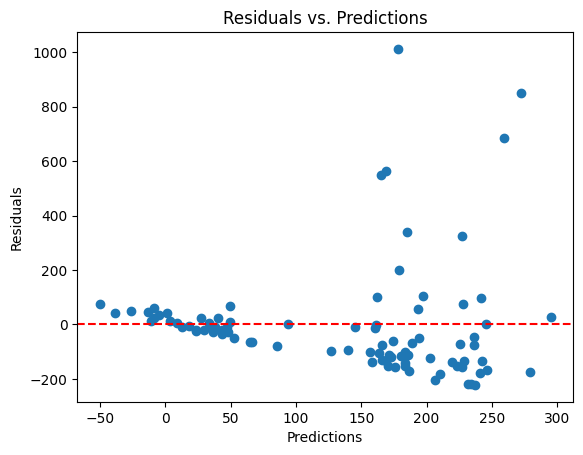

In [55]:
# Q7c (code): Homoscedasticity Test (plot residuals vs. predictions )

# define variables of the plot
plt.scatter(predictions, residuals)
# define title
plt.title('Residuals vs. Predictions')
# define x lable
plt.xlabel('Predictions')
# define y label
plt.ylabel('Residuals')
# define features of the plot
plt.axhline(y=0, color='r', linestyle='--')
# dispaly the plot
plt.show()




In the residuals vs. predicted values plot, you would look for patterns. In a well-fitted model, you would expect to see the residuals randomly scattered around zero, with no clear pattern. The presence of a pattern might suggest issues with model specification, such as non-linearity or heteroscedasticity.

In [65]:
# Q7d (words): Write your analysis for the Homoscedasticity Test here:
'''The predicted values of kudos increase, the spread of the residuals also increases. This pattern suggests the heteroscedasticity. This violates one of the key assumptions of Ordinary Least Squares regression.'''

'The predicted values of kudos increase, the spread of the residuals also increases. This pattern suggests the heteroscedasticity. This violates one of the key assumptions of Ordinary Least Squares regression.'

**Q8: Multicollinearity**

In [57]:
# Q8a (code)
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Checking VIF (Variance Inflation Factor) for multicollinearity

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
# print result
print(vif_data)

                 feature         VIF
0  masculine_power_score    1.853277
1         published_year  121.809743
2       lexical_richness  121.772520


Regarding multicollinearity, the VIF values for masculine_power_score, lexical_richness, and published_year are close to 1, which suggests low multicollinearity. However, the very high VIF for the const term, along with the large condition number, suggests that there may be numerical issues, possibly due to a large scale difference between predictors or multicollinearity issues not captured by standard VIF calculations.

In [61]:
# Q8b (words): Write your analysis for the multicollinearity test here:
'''masculine_power_score (VIF = 1.853277): This VIF value suggests low multicollinearity.So "masculine_power_score" is relatively independent of other predictors in the model, meaning its contribution to the regression model can be clearly interpreted without significant interference from correlations with other variables.

published_year (VIF = 121.809743),lexical_richness (VIF = 121.772520): Both of these variables have VIF values far exceeding the common thresholds, indicating a strong presence of multicollinearity. Such high VIF values suggest that there may be numerical issues, possibly due to a large scale difference between predictors or multicollinearity issues not captured by standard VIF calculations.'''

'masculine_power_score (VIF = 1.853277): This VIF value suggests low multicollinearity.So "masculine_power_score" is relatively independent of other predictors in the model, meaning its contribution to the regression model can be clearly interpreted without significant interference from correlations with other variables.\n\npublished_year (VIF = 121.809743),lexical_richness (VIF = 121.772520): Both of these variables have VIF values far exceeding the common thresholds, indicating a strong presence of multicollinearity. Such high VIF values suggest that there may be numerical issues, possibly due to a large scale difference between predictors or multicollinearity issues not captured by standard VIF calculations.'

**Q9: Reflection**

In [67]:
# Q9 (words): Write your reflection on the whole research framework and corresponding result here, e.g., what do you think can be improved?
''' The multicollineaity issues suggest maybe the published year and the lexical richness have high degree of multicollinearity. To solve the problem, one of the variable coulbe be removed. Other than that, the residuals are not closely following a normal distribution, this means the model needs to be checked and adjusted. The data needs to be checked for the outliners too. Results of Homoscedasticity Test shows Ordinary Least Squares regression is not suitable due to heteroscedasticity.  '''


' The multicollineaity issues suggest maybe the published year and the lexical richness have high degree of multicollinearity. To solve the problem, one of the variable coulbe be removed. Other than that, the residuals are not closely following a normal distribution, this means the model needs to be checked and adjusted. The data needs to be checked for the outliners too. Results of Homoscedasticity Test shows Ordinary Least Squares regression is not suitable due to heteroscedasticity.  '

##**Reference:**##

Seymour Benjamin Chatman. 1980. Story and Discourse: Narrative Structure in Fiction and Film. Cornell University Press, Ithaca, NY, USA.

Bennet, Andrew, and Nicholas Royle. Introduction to Literature Criticism and Theory. Edinburgh: Pearson Education Limited, 2004.Web.July. 2017.

Reaske, Christoper Russel. Analyze Drama. New York: Monarch Press, 1996. Print.

Jung, Sun “Bae Yong-Joon, Soft Masculinity, and Japanese Fans: Our Past Is in Your Present Body” from Korean Masculinities and Transcultural Consumption, Hong Kong Scholarship Online, 2010.

Kuo, Linda, et al., “Performance, Fantasy, or Narrative: LGBTQ+ Asian American Identity through Kpop Media in Fandom”, Journal of Homosexuality, 2020.

Kwon, Jungmin, Straight Korean Female Fans and Their Gay Fantasies, University of Iowa Press, 2019, ebook.

Oh, Chuyun, “Queering spectatorship in K-pop: The androgynous male dancing body and western female fandom”, Journal of Fandom Studies, vol. 3, no. 1, 2015, pp. 59-78.